runge-kutta
===

dy/dt = f(t,y)  
y_ {n+1} = y_n + 1/6 * (k1 + 2 * k2 + 2 * k3 + k4)
t_ {n +1} = t_n + h

k1 = h * f(f_n, y_n)
k2 = h * f 

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
def deposit(D0, t):
    if t == 0:
        return D0
    D = D0 / t
    if D > 0:
        return D
    return 0

In [45]:
def savings_account_ode(t, A, W, D, r):
    dA_dt = r * A + deposit(D, t) - W
    return dA_dt

In [46]:
def runge_kutta_4th_order(f, t0, A0, r, D, W, h, n_iters):
    t_values = [t0]
    A_values = [A0]
    
    for _ in range(n_iters):
        t = t_values[-1]
        A = A_values[-1]

        k1 = h * f(t, A, W, D, r)
        k2 = h * f(t + h/2, A + k1/2, W, D, r)
        k3 = h * f(t + h/2, A + k2/2, W, D, r)
        k4 = h * f(t + h, A + k3, W, D, r)

        A_new = A + (k1 + 2*k2 + 2*k3 + k4)/6
        t_new = t + h

        t_values.append(t_new)
        A_values.append(A_new)
    return t_values, A_values
    

In [47]:
t0 = 0
A0 = 100
W = 50
D = 100
r = 0.05
h = 0.01
n_iters = 5000

t_values, A_values = runge_kutta_4th_order(savings_account_ode, t0, A0, r, D, W, h, n_iters)

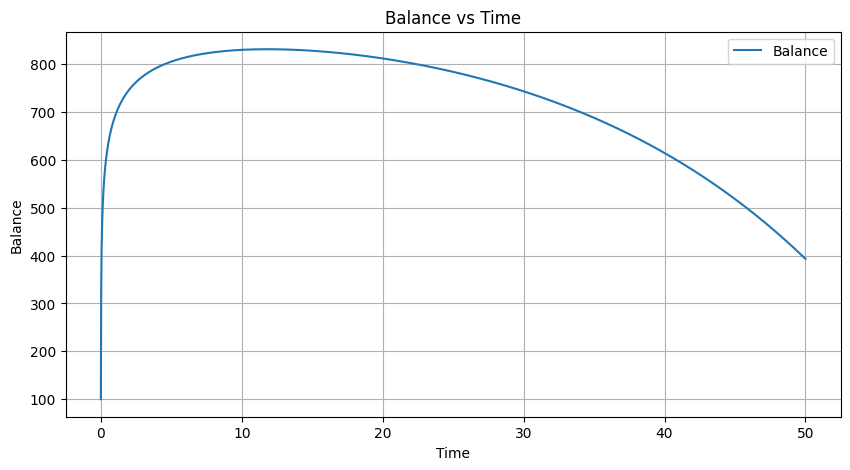

In [48]:
_ = plt.figure(figsize=(10, 5))
plt.plot(t_values, A_values, label = "Balance")
plt.xlabel("Time")
plt.ylabel("Balance")
plt.legend()
plt.title("Balance vs Time")
plt.grid()
plt.show()